In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scsp
import seaborn as sb
import math
from scipy.integrate import quad
from scipy import special

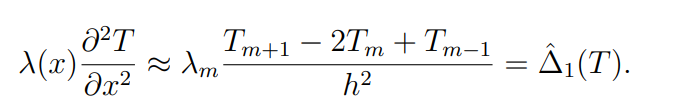
---


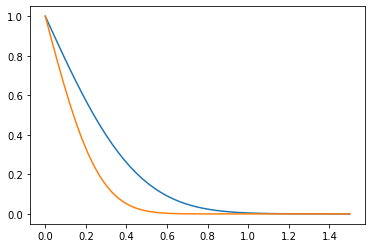

In [ ]:
dt = 0.0003
dx = 0.03
t = np.arange(0, 1.5 + dt, dt)
x = np.arange(0, 1.5 + dx, dx)


koeflambda = 1 # коэффициент теплопроводности
t_left = 1
t_right = 0

T = np.zeros((len(t),len(x)))

Th = np.zeros((len(t),len(x)))
Th[0][0] = 1*t_left

for i in range(1,len(t)):
    for j in range(len(x)):
        Th[i][j] = (1 - scsp.erf(j/2 /np.sqrt(koeflambda*i)))*t_left            #в этом цикле мы строим решение по формуле (3)
plt.plot(x,Th[70])


for i in range(len(t)):                                                         #граничные условия
    T[i][0] = t_left
    T[i][len(x)-1] = t_right

for i in range(len(t)-1):
    for j in range(1,len(x)-1):
        T[i+1][j] = T[i][j] + (T[i][j-1] -2*T[i][j] +T[i][j+1]) / (dx**2)*dt*koeflambda    # в этом циле аппроксимация разностного оператора Лапласа

plt.plot(x,T[70])
plt.show()

Аналогичное решение приведем для нелинейного уравнения. 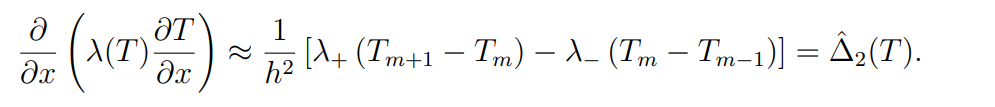

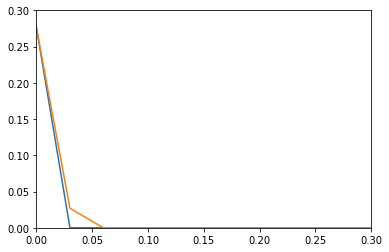

In [ ]:
sigma = 3
T0 = 10**(0)
T = np.zeros((len(t),len(x)))

c = np.sqrt(koeflambda*(T0**sigma)/sigma)

Th = np.zeros((len(t),len(x)))
Th[0][0] = 1*T0


for i in range(len(t)):
    for j in range(len(x)):
        if(j*dx<c*i*dt): Th[i][j] = (sigma*c/koeflambda*(c*i*dt-j*dx))**(1/sigma)
        else: Th[i][j] = 0

for j in range(1,len(x)):                                                       #Начальные условия
    T[0][j] = 0

for i in range(len(t)):                                                         #Граничные условия
    T[i][0] = T0*(i*dt)**(1/sigma)
    T[i][len(x)-1] = 0

for i in range(len(t)-1):
    for j in range(1,len(x)-1):
        lam_o = (koeflambda*(T[i][j])**sigma) #задана зависимость от температуры
        lambda_plus = ((koeflambda*(T[i][j+1])**sigma)+lam_o)/2
        lambda_minus = ((koeflambda*(T[i][j-1])**sigma)+lam_o)/2
        T[i+1][j] = T[i][j]+(lambda_plus*(T[i][j+1] -T[i][j])-lambda_minus*(T[i][j] -T[i][j-1]))*dt/(dx**2)

plt.axis([0, 0.3, 0, 0.3])
plt.plot(x,Th[70])
plt.plot(x,T[70])
plt.show()

Схема 0 для линейного случая

In [ ]:
lamb=1
cur=0.3
X_steps=50
X_size=np.pi
dh=X_size/X_steps
dt=cur*dh**2/lamb

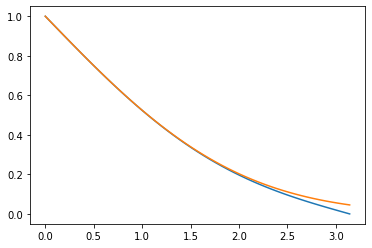

In [ ]:
Time_steps=int(X_size**2/(4*lamb)//dt)

u=np.zeros((Time_steps,X_steps+1))

x=np.linspace(0,X_size,X_steps+1)
t=np.linspace(0,X_size**2/(4*lamb),Time_steps)
cur=lamb*(t[1]-t[0])/(x[1]-x[0])**2
u[:,0]=1 

for i in range(Time_steps-1):
    u[i+1,1:-1]=u[i,1:-1]+cur*(u[i,2:]-2*u[i,1:-1]+u[i,:-2])

u_cor=np.zeros((Time_steps,X_steps+1))

X, T = np.meshgrid(x, t[1:])
u_cor[:,0]=1
u_cor[1:]=special.erfc(X/(2*(lamb*T)**0.5))

for i in range(Time_steps//2,Time_steps-1,Time_steps//2):
    plt.plot(x,u[i,:])
    plt.plot(x,u_cor[i,:])
    
plt.show()





Схема 0 для нелинейного случая

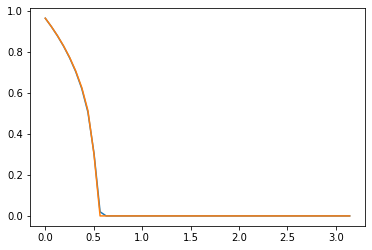

In [ ]:
T_0=1
sigma=3
c=(T_0**sigma*lamb/sigma)**0.5
eta=0.25
dt=0.5*dh**2/(2*T_0**sigma*lamb*eta*X_size/c)
Time_steps=int(eta*X_size/c//dt)

u=np.zeros((Time_steps,X_steps+1))

x=np.linspace(0,X_size,X_steps+1)
t=np.linspace(0,eta*X_size/c,Time_steps)
dt=(t[1]-t[0])
dx=(x[1]-x[0])

cur=lamb*dt/dx**2

t_0=2*dx/c

u[0]=np.where(c*t_0>x,(sigma*c/lamb*np.abs(c*t_0-x))**(1/sigma),0)
u[:,0]=T_0*(t+t_0)**(1/sigma)
 
def lamb_calc(u_1,u_2,sigma):
    return (u_1**sigma+u_2**sigma)/2

   
for i in range(Time_steps-1):
    lamb_plus=lamb_calc(u[i,1:-1],u[i,2:],sigma)
    lamb_minus=lamb_calc(u[i,1:-1],u[i,:-2],sigma)
    u[i+1,1:-1]=u[i,1:-1]+cur*lamb_plus*(u[i,2:]-u[i,1:-1])-cur*lamb_minus*(u[i,1:-1]-u[i,:-2])
    
    
    u_s=u[i+1]

X, T = np.meshgrid(x, t)

u_cor=np.where(c*(t_0+T)>X,(sigma*c/lamb*np.abs(c*(t_0+T)-X))**(1/sigma),0)

for i in range(Time_steps//2,Time_steps-1,Time_steps//2):
    plt.plot(x,u[i,:])
    plt.plot(x,u_cor[i,:])
    

plt.show()




Схема 1

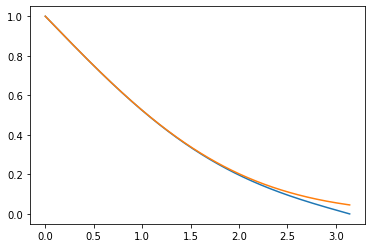

In [ ]:
theta=0.5
lamb=0.1
cur=20
X_steps=1000
X_size=np.pi
dh=X_size/X_steps
dt=cur*dh**2/lamb

Time=X_size**2/(4*lamb)
Time_steps=int(Time//dt)

u=np.zeros((Time_steps,X_steps+1))

x=np.linspace(0,X_size,X_steps+1)
t=np.linspace(0,Time,Time_steps)
dt=t[1]-t[0]
dx=x[1]-x[0]
cur=lamb*dt/dx**2

u[:,0]=1

def Progonka(T_0,T_M,a,b,с,d):
    n=np.shape(a)[0]
    P=np.zeros(n+1)
    Q=np.zeros(n+1)
    T=np.zeros(n+2)
    P[0]=0
    Q[0]=T_0
    T[0]=T_0
    T[n+1]=T_M
    for i in range(n):
        P[i+1]=c[i]/(b[i]-a[i]*P[i])
        Q[i+1]=(a[i]*Q[i]-d[i])/(b[i]-a[i]*P[i])
    for i in range(n,0,-1):
        T[i]=P[i]*T[i+1]+Q[i]
    return T[1:-1]


a=-cur*np.ones(X_steps-1)
b=(-2*cur-(1+theta))*np.ones(X_steps-1)
c=a


for i in range(1,Time_steps-1):        
    u[i+1,1:-1]=Progonka(1,0,a,b,c,(1+theta)*u[i,1:-1]+theta*(u[i,1:-1]-u[i-1,1:-1]))  
    

u_cor=np.zeros((Time_steps,X_steps+1))

X, T = np.meshgrid(x, t[1:])


u_cor[:,0]=1
u_cor[1:]=special.erfc(X/(2*(lamb*T)**0.5))

for i in range(Time_steps//2,Time_steps-1,Time_steps//2):
    plt.plot(x,u[i,:])
    plt.plot(x,u_cor[i,:])

plt.show()



нулевой поток

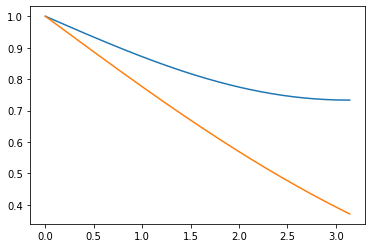

In [ ]:
theta=0.5
lamb=1
cur=20
X_steps=200
X_size=np.pi
dh=X_size/X_steps
dt=cur*dh**2/lamb
Time=5*X_size**2/(4*lamb)
Time_steps=int(Time//dt)

u=np.zeros((Time_steps,X_steps+1))

x=np.linspace(0,X_size,X_steps+1)
t=np.linspace(0,Time,Time_steps)
dt=t[1]-t[0]
dx=x[1]-x[0]
cur=lamb*dt/dx**2

u[:,0]=1


def func_progon(T_0,a,b,с,d):
    n=np.shape(a)[0]
    P=np.zeros(n+1)
    Q=np.zeros(n+1)
    T=np.zeros(n+2)
    P[0]=0
    Q[0]=T_0
    T[0]=T_0
    for i in range(n):
        P[i+1]=c[i]/(b[i]-a[i]*P[i])
        Q[i+1]=(a[i]*Q[i]-d[i])/(b[i]-a[i]*P[i])
    T[n+1]=Q[i]/(1-P[i])
    for i in range(n,0,-1):
        T[i]=P[i]*T[i+1]+Q[i]
    return T[1:]

a=-cur*theta*np.ones(X_steps-1)
b=(-2*cur*theta-1)*np.ones(X_steps-1)
c=a

for i in range(1,Time_steps-1):        
    u[i+1,1:-1]=func_progon(1, a,b,c,u[i,1:-1]+(1-theta)*cur*(u[i,2:]-2*u[i,1:-1]+u[i,:-2]))  
    
u_cor=np.zeros((Time_steps,X_steps+1))

X, T = np.meshgrid(x, t[1:])


u_cor[:,0]=1
u_cor[1:]=special.erfc(X/(2*(lamb*T)**0.5))

for i in range(Time_steps//2,Time_steps-1,Time_steps//2):
    plt.plot(x,u[i,:])
    plt.plot(x,u_cor[i,:])
    

plt.show()



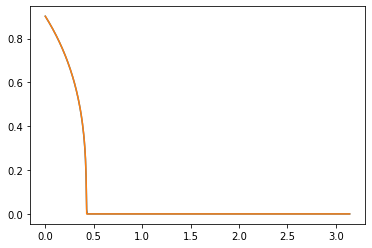

In [ ]:
T_0=1
sigma=3

def func_progon(T_0,T_M,a,b,c,d):
    n=np.shape(a)[0]
    P=np.zeros(n+1)
    Q=np.zeros(n+1)
    T=np.zeros(n+2)
    P[0]=0
    Q[0]=T_0
    T[0]=T_0
    T[n+1]=T_M
    for i in range(n):
        P[i+1]=c[i]/(b[i]-a[i]*P[i])
        Q[i+1]=(a[i]*Q[i]-d[i])/(b[i]-a[i]*P[i])
    for i in range(n,-1,-1):
        T[i]=P[i]*T[i+1]+Q[i]
    
    return T[1:-1]
c=(T_0**sigma*lamb/sigma)**0.5
X_steps=500
X_size=np.pi
dh=X_size/X_steps
dt=0.5*dh**2/(2*T_0**sigma*lamb*0.25*X_size/c)*100

Time_steps=int(0.25*X_size/c//dt)

u=np.zeros((Time_steps,X_steps+1))

x=np.linspace(0,X_size,X_steps+1)
t=np.linspace(0,0.25*X_size/c,Time_steps)
dt=(t[1]-t[0])
dx=(x[1]-x[0])

cur=lamb*dt/dx**2

t_0=5*dx/c

u[0]=np.where(c*t_0>x,(sigma*c/lamb*np.abs(c*t_0-x))**(1/sigma),0)
u[:,0]=T_0*(t+t_0)**(1/sigma)

for i in range(Time_steps-1):
            
    lamb_plus=lamb_calc(u[i,1:-1],u[i,2:],sigma)
    lamb_minus=lamb_calc(u[i,1:-1],u[i,:-2],sigma)
    
    a_2=-lamb_minus*cur*theta
    b_2=-cur*theta*(lamb_plus+lamb_minus)-1
    c_2=-lamb_plus*cur*theta
    d_2=u[i,1:-1]+(1-theta)*cur*(lamb_plus*(u[i,2:]-u[i,1:-1])-lamb_minus*(u[i,1:-1]-u[i,:-2]))
    u[i+1,1:-1]=func_progon(u[i+1,0],0,a_2,b_2,c_2,d_2)
    u_s=u[i+1]

X, T = np.meshgrid(x, t)

u_cor=np.where(c*(t_0+T)>X,(sigma*c/lamb*np.abs(c*(t_0+T)-X))**(1/sigma),0)

for i in range(Time_steps//2,Time_steps-1,Time_steps//2):
    plt.plot(x,u[i,:])
    plt.plot(x,u_cor[i,:])

plt.show()